<a href="https://colab.research.google.com/github/Mejayyy/AnomalyDet/blob/main/AD_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
!pip install pyod
!pip install scikit-learn
!pip install combo

In [156]:

import numpy as np
import matplotlib.pyplot as plt


from pyod.utils.data import generate_data_clusters
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from pyod.utils.utility import standardizer
from pyod.models.combination import average
from pyod.models.combination import maximization
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix,roc_curve
from pyod.models.lof import LOF




 In cazul optiunii  1 , cand x-urile au dimensiunea 1 h-urile se insumeaza la valoarea: 
1.9999999999999996

 In cazul optiunii  2 , cand x-urile au dimensiunea 1 h-urile se insumeaza la valoarea: 
2.0

 In cazul optiunii  3 , cand x-urile au dimensiunea 1 h-urile se insumeaza la valoarea: 
2.0

 In cazul optiunii  4 , cand x-urile au dimensiunea 1 h-urile se insumeaza la valoarea: 
2.0

 In cazul optiunii  1 , cand x-urile au dimensiunea 2 h-urile se insumeaza la valoarea: 
3.0

 In cazul optiunii  2 , cand x-urile au dimensiunea 2 h-urile se insumeaza la valoarea: 
2.9999999999999996

 In cazul optiunii  3 , cand x-urile au dimensiunea 2 h-urile se insumeaza la valoarea: 
3.000000000000001

 In cazul optiunii  4 , cand x-urile au dimensiunea 2 h-urile se insumeaza la valoarea: 
3.0


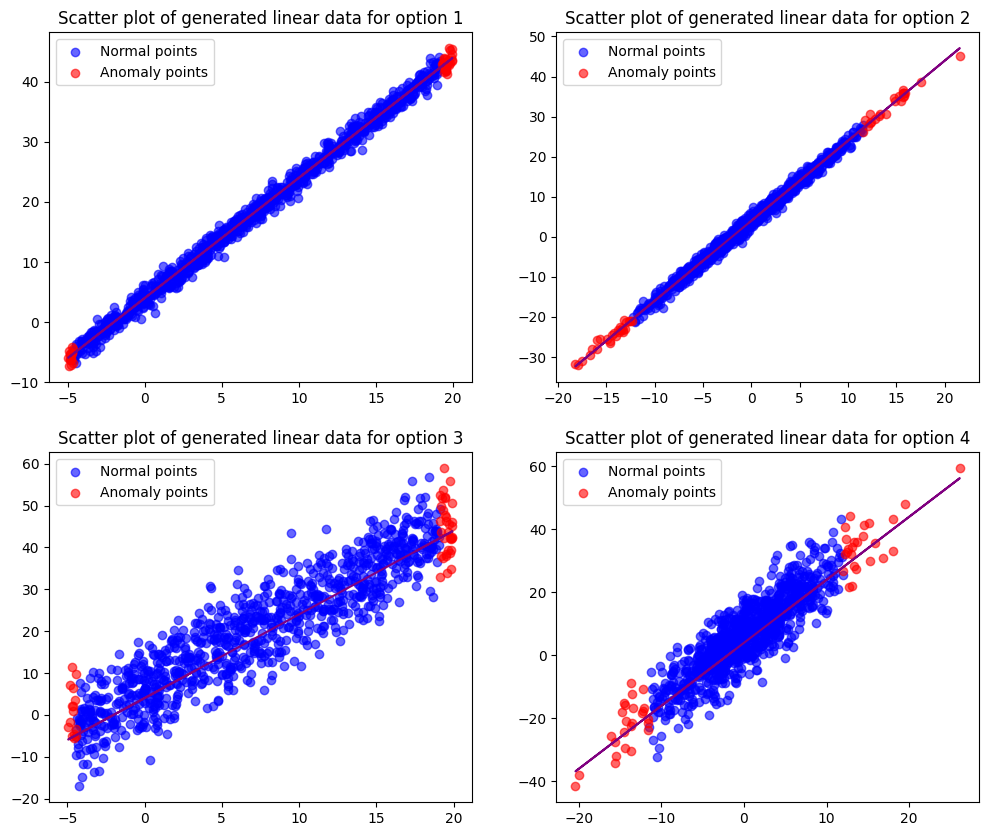

In [157]:
#Setez valoarea datelor si generez 4 figuri
n=1000
a=2
b=4
c=3

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

def linear(a=2,b=4,c=3,miu=2,sigma=6,n=1000,opt=1, dim=1):
  #Tratez cazurile 1D si 2D pentru X, cat si optiunile de distributie
  if dim==1:
    ab=np.array([a,b])
  if dim==2:
    ab=np.array([a,b,c])

  if opt==1:
    x=np.random.uniform(low=-5,high=20, size=(n,dim))
    eps=np.random.normal(0,1,size=n)
  if opt==2:
    x=np.random.normal(0,6,size=(n,dim))
    eps=np.random.normal(0,1,size=n)
  if opt==3:
    x=np.random.uniform(low=-5,high=20, size=(n,dim))
    eps=np.random.normal(miu,sigma,size=n)
  if opt==4:
    x=np.random.normal(0,6,size=(n,dim))
    eps=np.random.normal(miu,sigma,size=n)

  # matricea X are 1 pe ultima coloana pentru calculul matriceal
  X = np.column_stack((x, np.ones(n)))

  Y=np.dot(X,ab)+eps

  return Y,x,X


def concluzii_1(opt=1,dim=1):
  print("\n In cazul optiunii ", opt, ", cand x-urile au dimensiunea {} h-urile se insumeaza la valoarea: ".format(dim))
  Y, x, X = linear(opt=opt,dim=dim)

  #Aici calculez acel (X.t * X)^-1
  XT=np.transpose(X)
  XTX=np.matmul(XT,X)
  L=np.linalg.cholesky(XTX)
  h=np.zeros(0)

  #Calculez h urile
  for i in range(n):
    v_0=np.linalg.solve(L,X[i,:])
    v=np.linalg.solve(L.T,v_0)
    h_i= np.dot(X[i,:], v)
    h=np.append(h,h_i)

  #print(h[:10])
  h_sum=np.sum(h)
  print(h_sum)

  #th=h_sum/n
  #print(th)
  #print(x[h>th].size)

  percentile_10 = np.percentile(h, 95)
  condition = h < percentile_10
  if dim ==1:
    ab=np.array([a,b])
    if opt==1:
      p1=0
      p2=0
    if opt ==2:
      p1=0
      p2=1
    if opt ==3:
      p1=1
      p2=0
    if opt == 4:
      p1=1
      p2=1


    axs[p1,p2].scatter(x[condition], Y[condition], alpha=0.6, color="blue", label="Normal points")
    axs[p1,p2].scatter(x[~(condition)], Y[~(condition)], alpha=0.6, color="red", label="Anomaly points")
    x_lin=np.linspace(-5,20)
    axs[p1,p2].plot(x,np.dot(X,ab), color='purple')
    #axs[p1,p2].xlabel("x")
    #axs[p1,p2].ylabel("Y")
    axs[p1,p2].set_title("Scatter plot of generated linear data for option {}".format(opt))
    axs[p1,p2].legend()


#Vreau w=(XTX)^-1 * X_i
#Vreau XTX w = X_i
# L*Lt w = X_i

for i in range(1,5):
  concluzii_1(i)

for i in range(1,5):
  concluzii_1(i,2)







 Pentru k =  1  Balanced Accuracy-ul este:  0.961111111111111

 Pentru k =  2  Balanced Accuracy-ul este:  0.9166666666666666

 Pentru k =  3  Balanced Accuracy-ul este:  0.9444444444444444

 Pentru k =  4  Balanced Accuracy-ul este:  0.9444444444444444

 Pentru k =  5  Balanced Accuracy-ul este:  0.9472222222222222

 Pentru k =  6  Balanced Accuracy-ul este:  0.9472222222222222

 Pentru k =  7  Balanced Accuracy-ul este:  0.9472222222222222


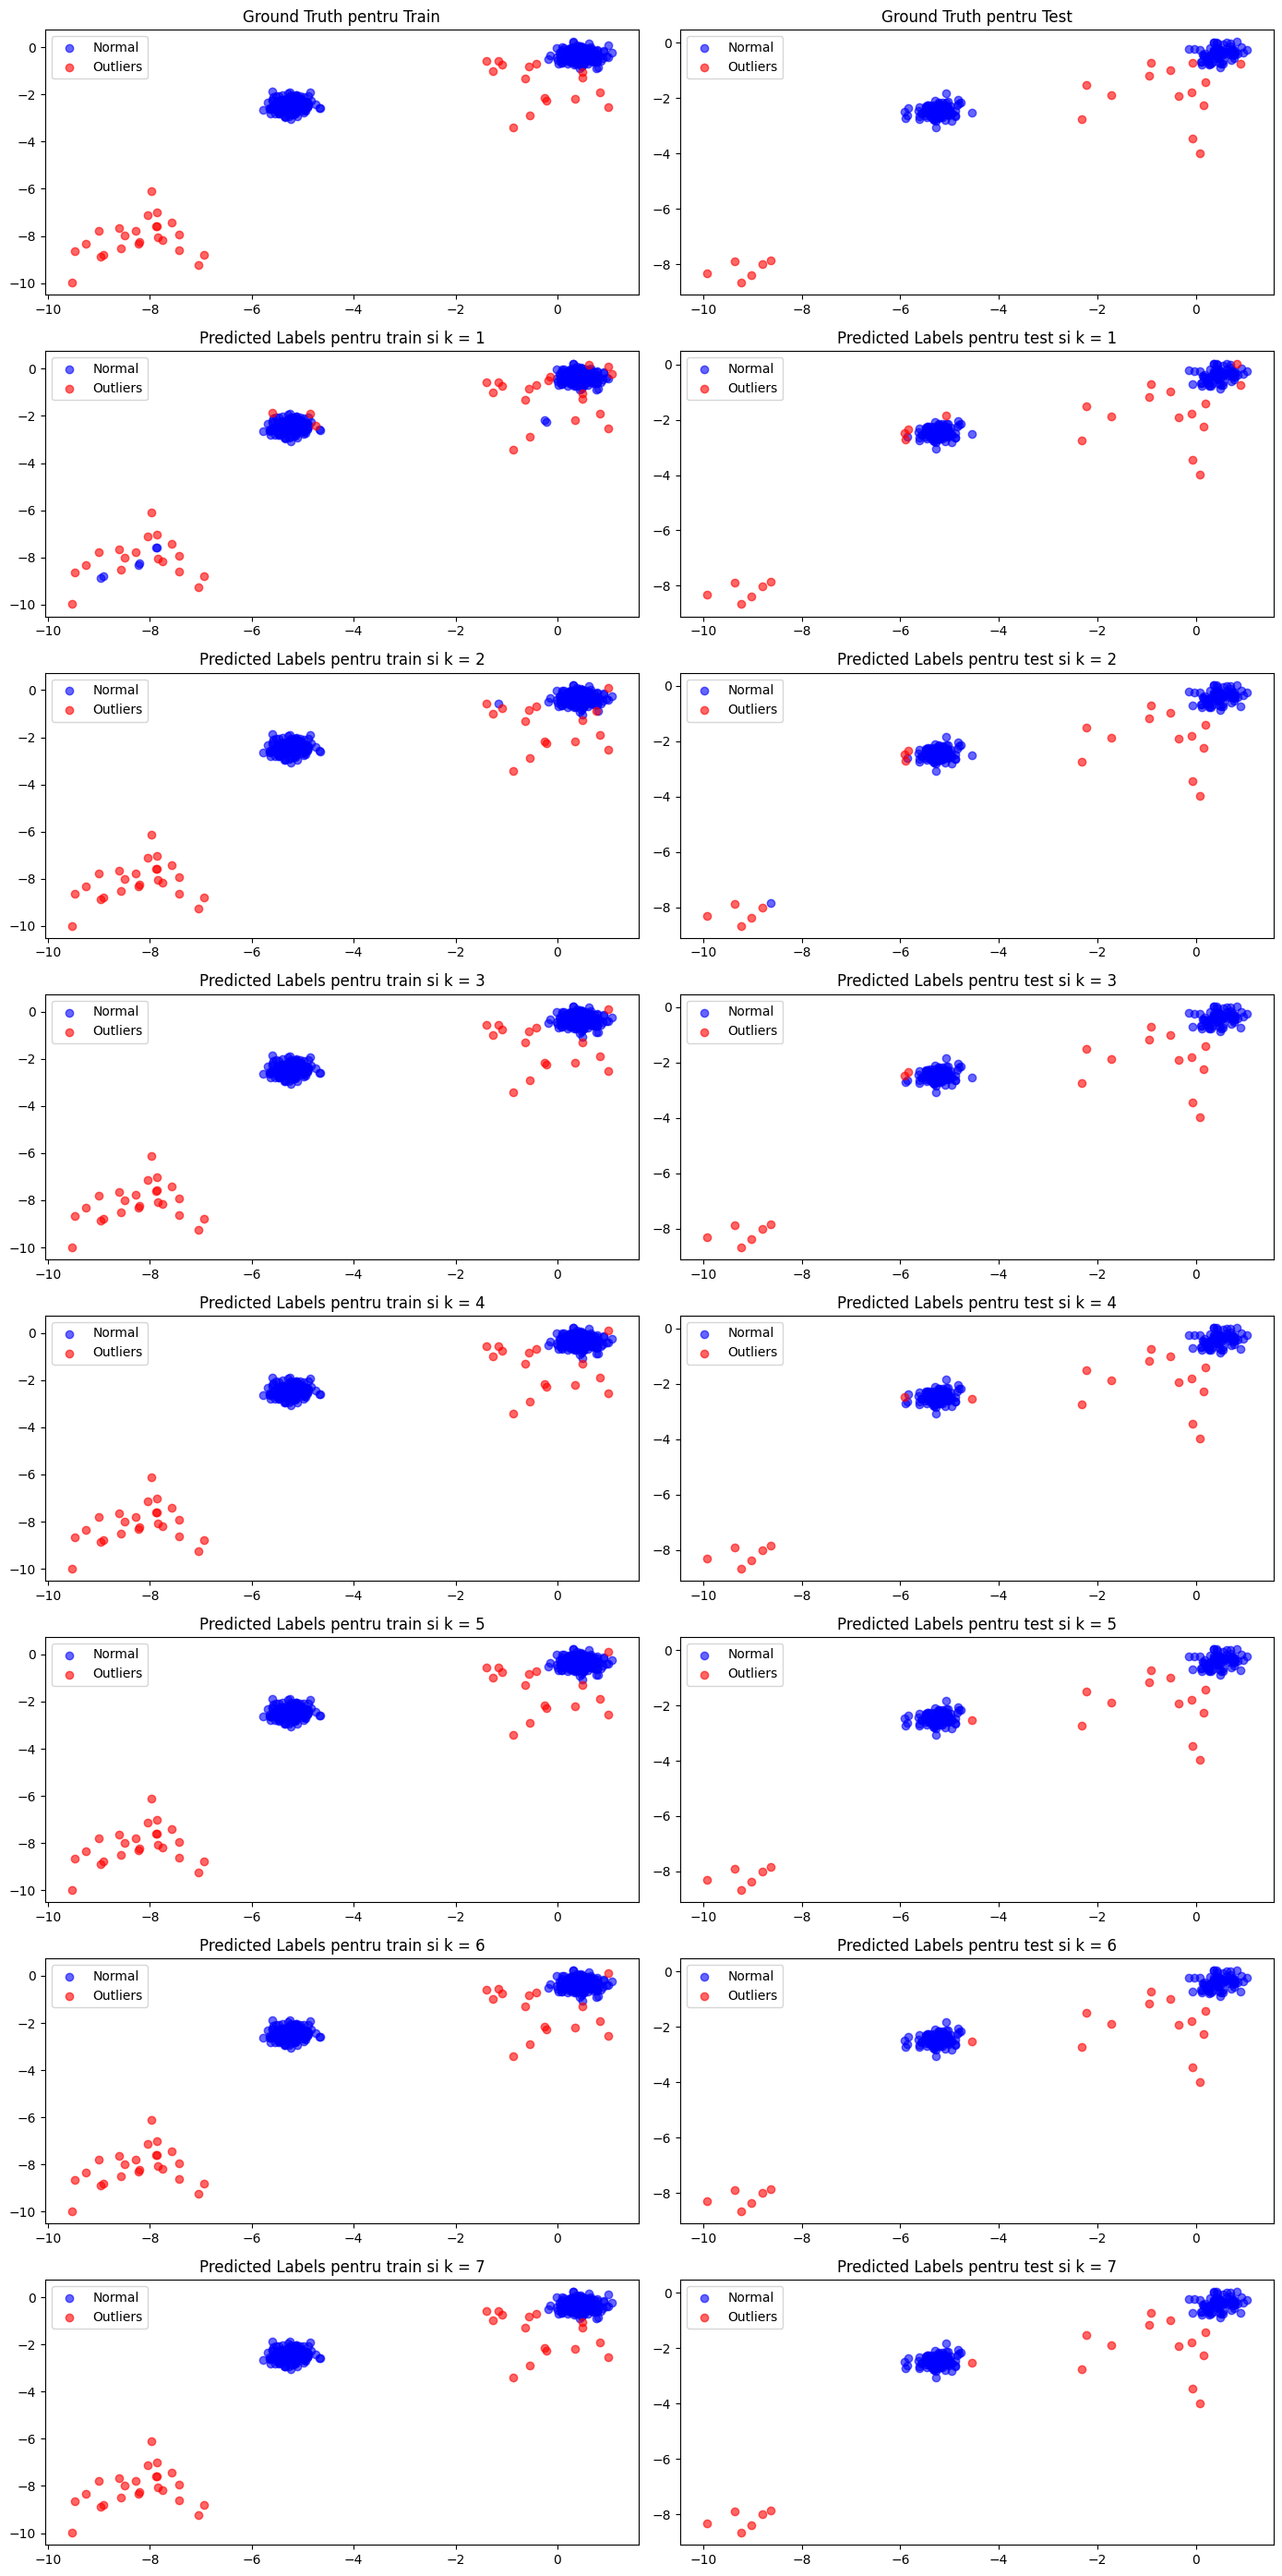

In [158]:
#Ex 2
#Generez cele 2 clustere
np.random.seed(420)
x_train,x_test,y_train,y_test=generate_data_clusters(n_train=400 , n_test=200, n_clusters=2, n_features=2, contamination=0.1)
normal_samples = x_train[y_train == 0]
outlier_samples = x_train[y_train == 1]

#Creez subploturile
k_max=7

fig, axs = plt.subplots(k_max+1, 2, figsize=(k_max*2, k_max*4))

#PRIMUL GRAFIC (Ground Truth Train)

axs[0, 0].scatter(normal_samples[:, 0], normal_samples[:, 1], c='blue', label='Normal',alpha=0.6)
axs[0, 0].scatter(outlier_samples[:, 0], outlier_samples[:, 1], c='red', label='Outliers',alpha=0.6)
axs[0, 0].set_title("Ground Truth pentru Train")
axs[0, 0].legend()


#AL DOILEA GRAFIC (Ground Truth Test)

test_normal_samples = x_test[y_test == 0]
test_outlier_samples = x_test[y_test == 1]

axs[0, 1].scatter(test_normal_samples[:, 0], test_normal_samples[:, 1], c='blue', label='Normal',alpha=0.6)
axs[0, 1].scatter(test_outlier_samples[:, 0], test_outlier_samples[:, 1], c='red', label='Outliers',alpha=0.6)
axs[0, 1].set_title("Ground Truth pentru Test")
axs[0, 1].legend()

#Generez predictiile
def knn_ploturi(k=5):
  knn=KNN(contamination=0.1, n_neighbors=k)
  knn.fit(x_train)


  y_train_pred=knn.labels_
  y_train_scores = knn.decision_scores_

  y_test_pred=knn.predict(x_test)
  y_test_scores = knn.decision_function(x_test)

  cm = confusion_matrix(y_test, y_test_pred)

  TN, FP, FN, TP = cm.ravel()

  TPR = TP / (TP + FN)
  TNR = TN / (TN + FP)

  balanced_accuracy = (TPR + TNR) / 2

  #Graficul (k,0) pentru train
  PredTrain_normal_samples=x_train[y_train_pred==0]
  PredTrain_outlier_samples=x_train[y_train_pred==1]

  axs[k, 0].scatter(PredTrain_normal_samples[:, 0], PredTrain_normal_samples[:, 1], c='blue', label='Normal',alpha=0.6)
  axs[k, 0].scatter(PredTrain_outlier_samples[:, 0], PredTrain_outlier_samples[:, 1], c='red', label='Outliers',alpha=0.6)
  axs[k, 0].set_title("Predicted Labels pentru train si k = {}".format(k))
  axs[k, 0].legend()

  #Graficul (k,1) pentru test
  PredTest_normal_samples=x_test[y_test_pred==0]
  PredTest_outlier_samples=x_test[y_test_pred==1]

  axs[k, 1].scatter(PredTest_normal_samples[:, 0], PredTest_normal_samples[:, 1], c='blue', label='Normal',alpha=0.6)
  axs[k, 1].scatter(PredTest_outlier_samples[:, 0], PredTest_outlier_samples[:, 1], c='red', label='Outliers',alpha=0.6)
  axs[k, 1].set_title("Predicted Labels pentru test si k = {}".format(k))
  axs[k, 1].legend()

  print("\n Pentru k = ",k, " Balanced Accuracy-ul este: ",balanced_accuracy)

for i in range(1,k_max+1):
  knn_ploturi(i)
  plt.tight_layout()
  #plt.show()



#plt.tight_layout()
#plt.show()


(200, 2) 
 (200,) 
 (100, 2) 
 (100,)


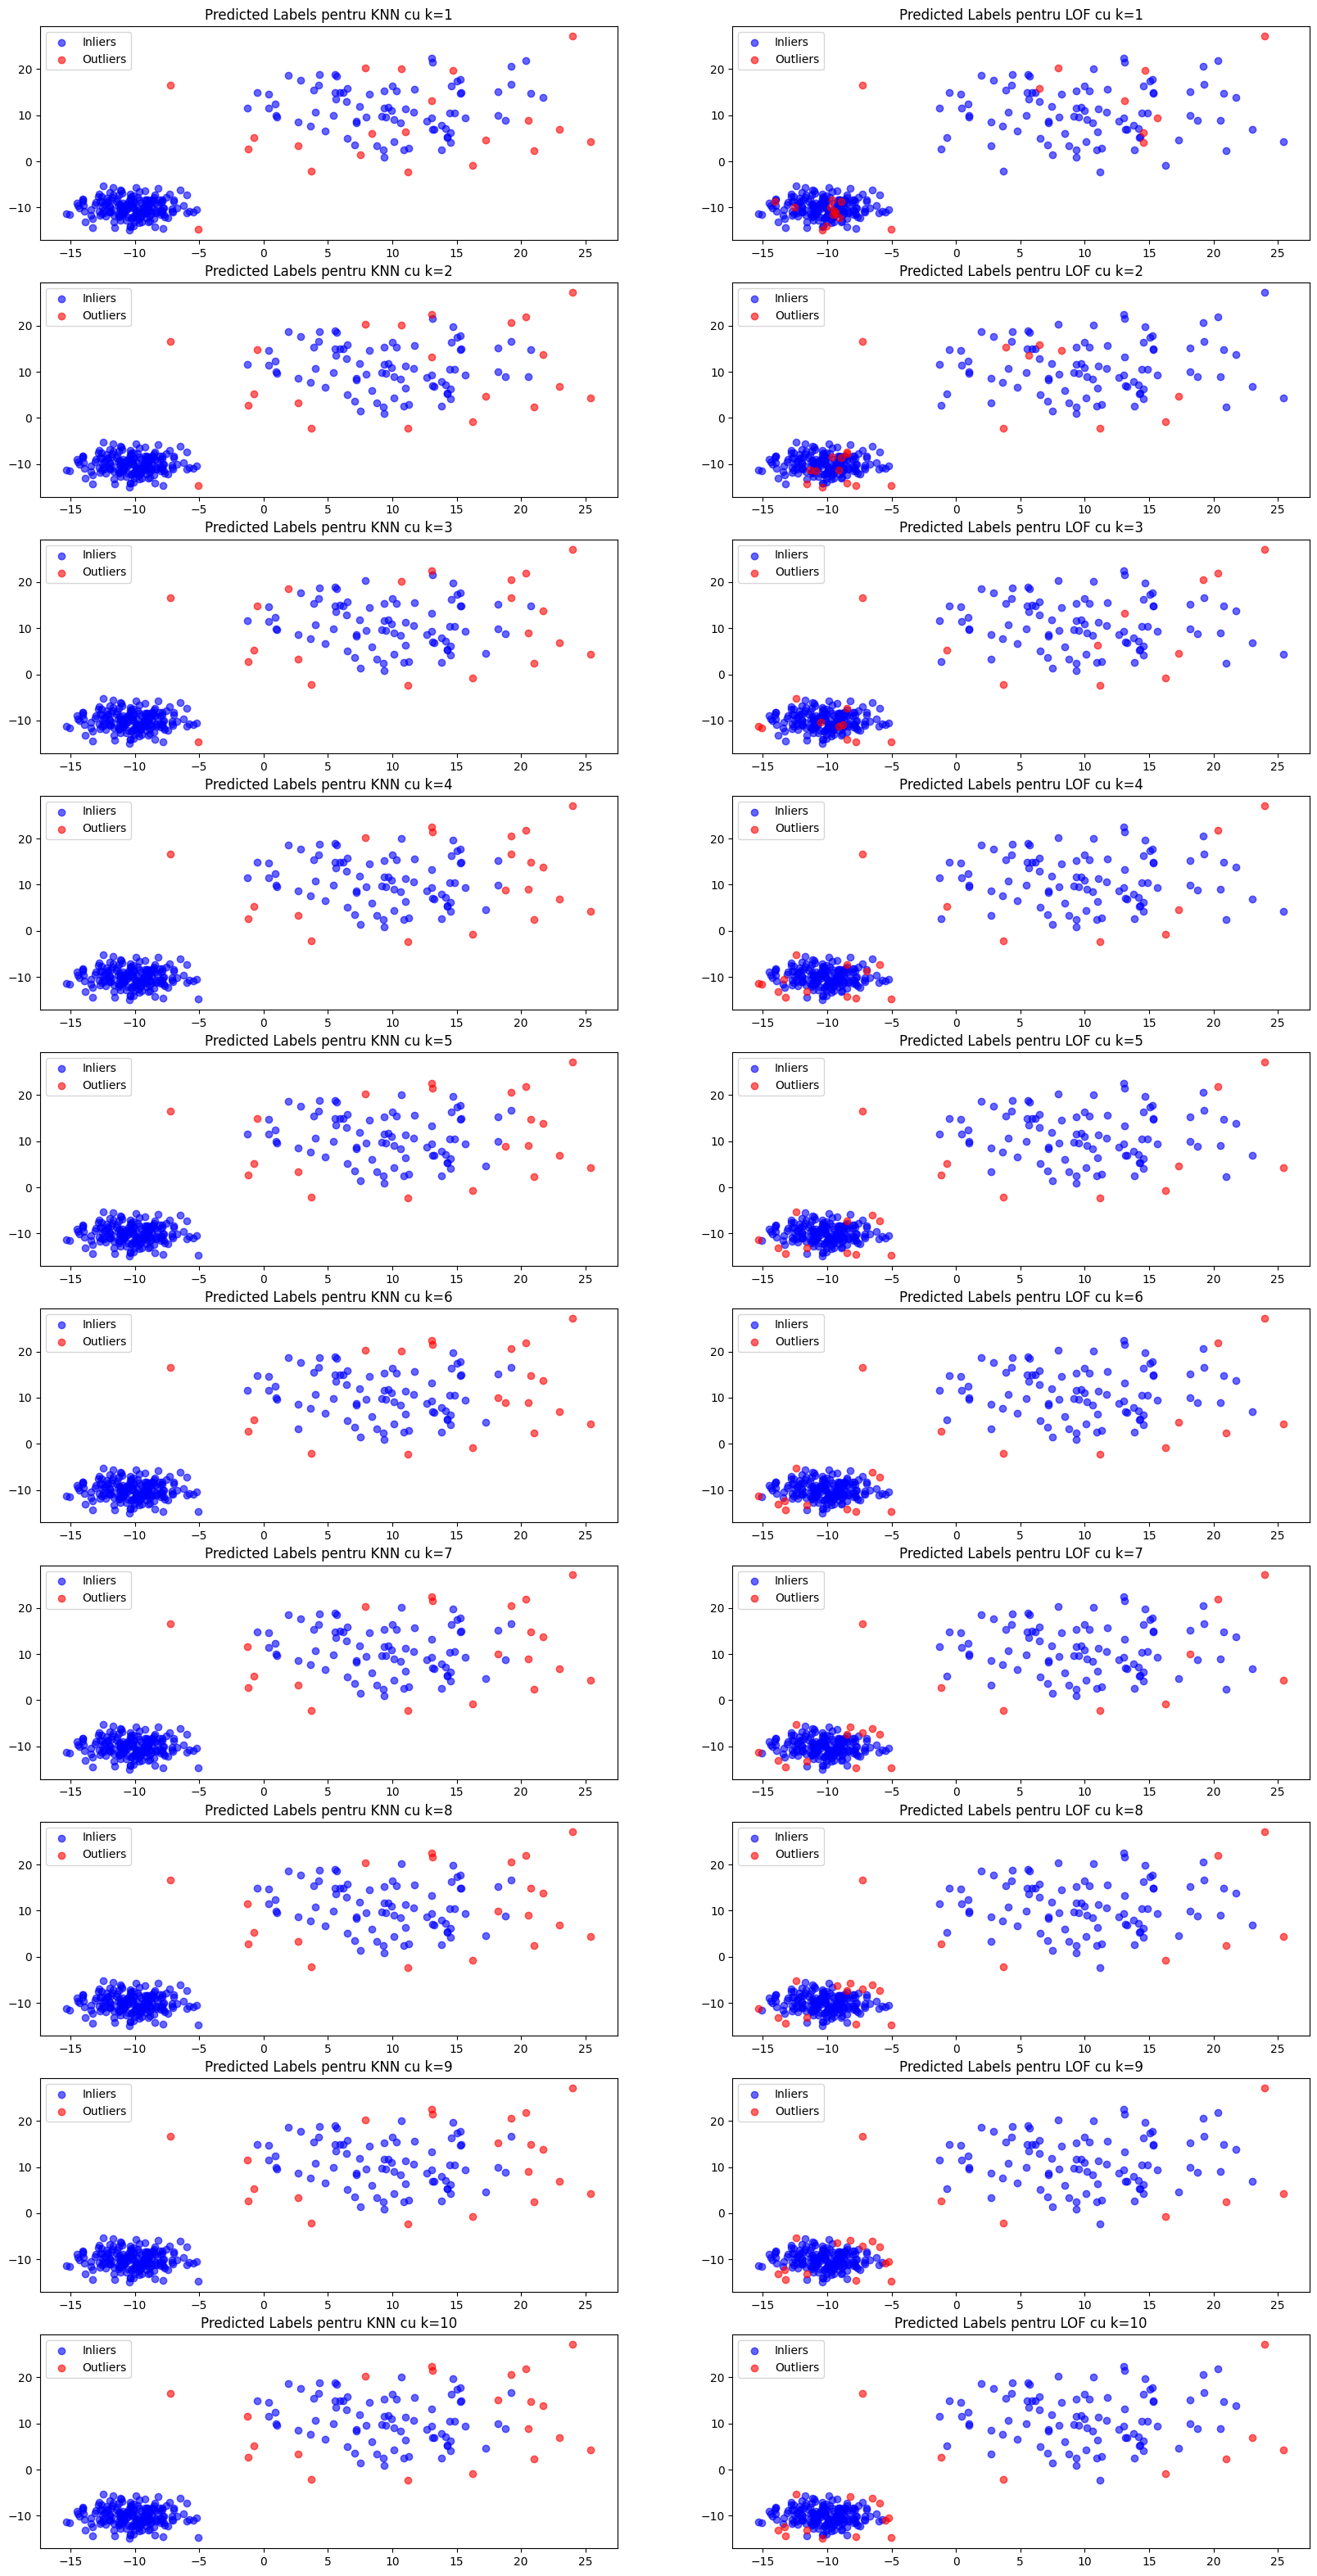

In [159]:
#Ex 3

#Construiesc subploturile si dau datele initiale
k_max=10
fig, axs = plt.subplots(k_max, 2, figsize=(k_max*2, k_max*4))


miu_1=np.array([-10,-10])
miu_2=np.array([10,10])

sig_1=2
sig_2=6

#Generez cele 2 clustere

x,_=make_blobs([200,100],n_features=2,centers=[miu_1,miu_2], cluster_std=[sig_1,sig_2])


blob_1=x[:200,:]
blob_1_labels=x_labels[:200]
blob_2=x[200:300,:]
blob_2_labels=x_labels[200:300]
print(blob_1.shape, "\n",blob_1_labels.shape,"\n",blob_2.shape,"\n",blob_2_labels.shape)



# Definesc o functie care foloseste KNN sau LOF, cazul k, si care construieste subploturile corespunzatoare
def ex_3(model,k,cont=0.07):
  if model==KNN:
    p=0
    model_str='KNN'
  elif model==LOF:
      p=1
      model_str='LOF'

  knn=model(contamination=cont, n_neighbors=k)
  knn.fit(x)
  y_labels=knn.labels_

  x_inlier=x[y_labels==0]
  x_outlier=x[y_labels==1]

  axs[k-1, p].scatter(x_inlier[:, 0], x_inlier[:, 1], c='blue', label='Inliers',alpha=0.6)
  axs[k-1, p].scatter(x_outlier[:, 0], x_outlier[:, 1], c='red', label='Outliers',alpha=0.6)
  axs[k-1, p].set_title("Predicted Labels pentru {} cu k={}".format(model_str,k))
  axs[k-1, p].legend()

for k in range(1,k_max+1):
  ex_3(model=KNN, k=k)
  ex_3(model=LOF,k=k)
  #plt.tight_layout()



In [160]:
#EX 4

#Dau load la datele mele si le split-uiesc
data = loadmat('cardio.mat')

print(data.keys())

X = data['X']  # replace 'X' with the correct key if different
y = data['y']  # replace 'y' with the correct key if different

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#Normalizez datele..?
X_train, X_test = standardizer(X_train, X_test)
"""
print("X_train shape dupa norm:", X_train.shape)
print("X_test shape dupa norm:", X_test.shape)

print("\nMedia si std ul pentru datele normalizate")
print(np.mean(X_train), "\n",np.std(X_train))
print(np.mean(X_test), "\n",np.std(X_test))

"""
p_train,p_test=y_train[y_train==1].shape[0]/y_train.shape[0], y_test[y_test==1].shape[0]/y_test.shape[0]

print("{:.4f} % din Train sunt anomalii. \n {:.4f} % din Test sunt anomalii. \n".format(p_train,p_test))


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X_train shape: (1464, 21)
X_test shape: (367, 21)
y_train shape: (1464, 1)
y_test shape: (367, 1)
0.0929 % din Train sunt anomalii. 
 0.1090 % din Test sunt anomalii. 



In [161]:

#Creez cate 10 modele pentru KNN si LOF:

#n_start=30
#n_end=120
#step=10

n_start=30
n_end=120
step=5

knn_list=[]
lof_list=[]

#A priori, intr-o problema reala, nu as sti p_test, asa ca folosesc contaminarea din train
cont=p_train

for i in range(n_start,n_end+step,step):
  knn_list.append(KNN(contamination=cont, n_neighbors=i))
  lof_list.append(LOF(contamination=cont, n_neighbors=i))

#Fituiesc fiecare model, calculez scorurile si BA:
knn_train_scores=[]
knn_test_scores=[]
knn_ba_train=[]
knn_ba_test=[]


lof_train_scores=[]
lof_test_scores=[]
lof_ba_train=[]
lof_ba_test=[]

def BA(Y,Y_pred):
  cm = confusion_matrix(Y, Y_pred)

  TN, FP, FN, TP = cm.ravel()

  TPR = TP / (TP + FN)
  TNR = TN / (TN + FP)

  balanced_accuracy = (TPR + TNR) / 2
  return balanced_accuracy

def fit(model):
  model.fit(X_train)
  y_train_pred=model.labels_
  y_train_scores = model.decision_scores_

  y_test_pred=model.predict(X_test)
  y_test_scores = model.decision_function(X_test)

  #BA Pentru train
  balanced_accuracy_train = BA(y_train,y_train_pred)

  #BA Pentru test
  balanced_accuracy_test = BA(y_test,y_test_pred)

  return y_train_scores, y_test_scores, balanced_accuracy_train, balanced_accuracy_test



19

 KNN BA Train:  [0.671708894401134, 0.6919737774627923, 0.6919737774627923, 0.7122386605244507, 0.708185683912119, 0.7162916371367825, 0.7122386605244507, 0.7162916371367825, 0.7162916371367825, 0.7162916371367825, 0.7203446137491141, 0.7325035435861091, 0.7365565201984408, 0.7365565201984408, 0.7406094968107725, 0.7446624734231042, 0.7446624734231042, 0.7406094968107725, 0.7446624734231042] 
 KNN BA Test [0.7331804281345566, 0.7581804281345565, 0.7581804281345565, 0.7456804281345566, 0.7581804281345565, 0.7581804281345565, 0.7581804281345565, 0.756651376146789, 0.769151376146789, 0.769151376146789, 0.769151376146789, 0.769151376146789, 0.769151376146789, 0.7816513761467889, 0.7816513761467889, 0.794151376146789, 0.794151376146789, 0.794151376146789, 0.7816513761467889] 
 LOF BA Train [0.5460666194188518, 0.5460666194188518, 0.5420136428065202, 0.5501195960311835, 0.5501195960311835, 0.5501195960311835, 0.5582255492558469, 0.5582255492558469, 0.5622785258681786, 0.570384479092842, 

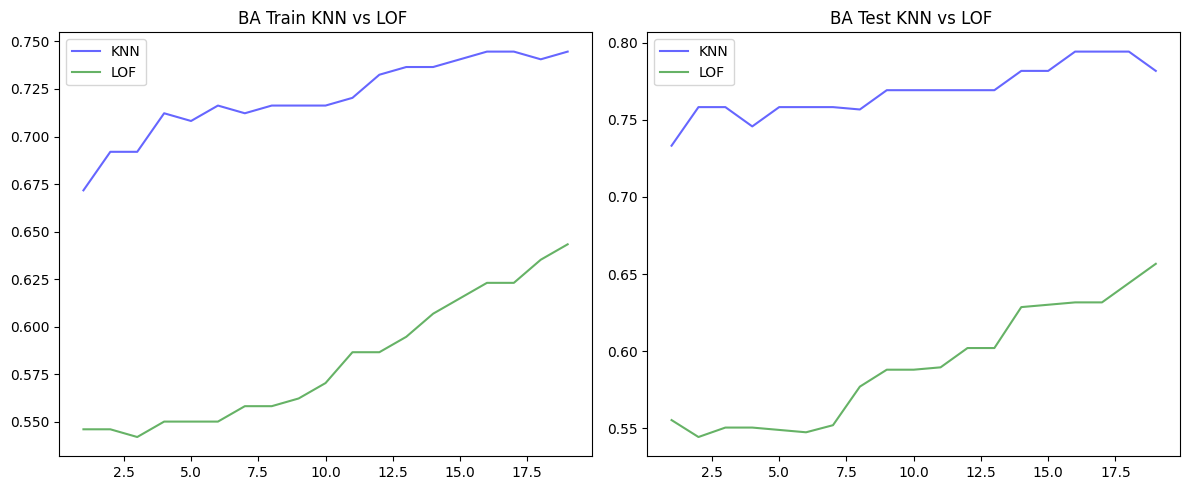

In [162]:
#print(knn_list)
numar=int((n_end-n_start)/step+1)
print(numar)
for i in range(0,numar):
  a,b,c,d= fit(knn_list[i])
  knn_train_scores.append(a)
  knn_test_scores.append(b)
  knn_ba_train.append(c)
  knn_ba_test.append(d)

  a,b,c,d= fit(lof_list[i])
  lof_train_scores.append(a)
  lof_test_scores.append(b)
  lof_ba_train.append(c)
  lof_ba_test.append(d)

print("\n KNN BA Train: ",knn_ba_train, "\n KNN BA Test", knn_ba_test, "\n LOF BA Train", lof_ba_train, "\n LOF BA Test", lof_ba_test)
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(range(1,numar+1),knn_ba_train,c='blue', label='KNN',alpha=0.6)
axs[0].plot(range(1,numar+1),lof_ba_train, c= 'green',label='LOF',alpha=0.6)
axs[0].set_title("BA Train KNN vs LOF ")
axs[0].legend()

axs[1].plot(range(1,numar+1),knn_ba_test,c='blue', label='KNN',alpha=0.6)
axs[1].plot(range(1,numar+1),lof_ba_test, c= 'green',label='LOF',alpha=0.6)
axs[1].set_title("BA Test KNN vs LOF ")
axs[1].legend()
plt.tight_layout()


In [163]:
#Aleg metoda KNN si compar strategia de average vs maximization
#Mai intai transform listele in matrice pentru a fi compatibile cu standardizer

knn_train_matrix = np.column_stack(knn_train_scores)
knn_test_matrix = np.column_stack(knn_test_scores)


print("knn_train_matrix shape:", knn_train_matrix.shape)
print("knn_test_matrix shape:", knn_test_matrix.shape)


knn_train_matrix_norm, knn_test_matrix_norm = standardizer(knn_train_matrix, knn_test_matrix)

# Verific shape urile
print("Standardized knn_train_matrix shape:", knn_train_matrix_norm.shape)
print("Standardized knn_test_matrix shape:", knn_test_matrix_norm.shape)

average_test = average(knn_test_matrix_norm)
maximization_test = maximization(knn_test_matrix_norm)

print(average_test.shape,"\n", maximization_test.shape)


knn_train_matrix shape: (1464, 19)
knn_test_matrix shape: (367, 19)
Standardized knn_train_matrix shape: (1464, 19)
Standardized knn_test_matrix shape: (367, 19)
(367,) 
 (367,)


In [164]:
threshold_avg=np.quantile(average_test,1-p_train)
threshold_max=np.quantile(maximization_test,1-p_train)

nr=average_test.size
y_avg_pred=np.zeros(nr)
y_max_pred=np.zeros(nr)

for i in range(nr):
  if average_test[i]>=threshold_avg:
    y_avg_pred[i]=1
  if maximization_test[i]>=threshold_max:
    y_max_pred[i]=1


ba_avg, ba_max = BA(y_test, y_avg_pred), BA(y_test, y_max_pred)

print("\n BA pentru strategia de average este {} .\n BA pentru strategia de maximization este {}".format(ba_avg, ba_max))


 BA pentru strategia de average este 0.769151376146789 .
 BA pentru strategia de maximization este 0.7831804281345566
